## 1.) Imports

In [71]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

from scipy import stats 
from scipy.stats import boxcox

import math

import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2.) EDA

In [72]:
df = pd.read_csv('highmark.csv')

### Viewing sample of the data set

In [73]:
df.head()

,ID,Target,empType,education,age,gender,addrsCategory,pinCode,addrsStateCode,phoneType,...,bureauName,bureauScore,disbursedDate,creditLimit,currentBalance,accountType,repaymentTenure,disbursedAmount,writeOffAmount,overdueAmount
0,77881000309,Approved,Others,NaN,21,Male,RESIDENCE,302026,RAJASTHAN,PERSONAL_MOBILE,...,HIGHMARK,825.0,05-01-2019,NaN,0.0,Consumer Loan,NaN,17470.0,0.0,0.0
1,77881000309,Approved,Others,NaN,21,Male,RESIDENCE,302026,RAJASTHAN,PERSONAL_MOBILE,...,HIGHMARK,825.0,16-04-2018,NaN,0.0,Consumer Loan,NaN,10209.0,0.0,0.0
2,77881000309,Approved,Others,NaN,21,Male,RESIDENCE,302026,RAJASTHAN,PERSONAL_MOBILE,...,HIGHMARK,825.0,15-03-2019,NaN,0.0,Personal Loan,NaN,50000.0,0.0,0.0
3,84215000101,Declined,Others,NaN,30,Male,RESIDENCE,713336,WEST BENGAL,PERSONAL_MOBILE,...,HIGHMARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67837000949,Approved,Others,NaN,23,Male,RESIDENCE,686004,KERALA,PERSONAL_MOBILE,...,HIGHMARK,830.0,30-07-2016,NaN,0.0,Two-Wheeler Loan,NaN,61980.0,0.0,NaN


### Info of the data set

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7726 entries, 0 to 7725
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7726 non-null   int64  
 1   Target            7726 non-null   object 
 2   empType           7726 non-null   object 
 3   education         1764 non-null   object 
 4   age               7726 non-null   int64  
 5   gender            7726 non-null   object 
 6   addrsCategory     7726 non-null   object 
 7   pinCode           7726 non-null   int64  
 8   addrsStateCode    7725 non-null   object 
 9   phoneType         7726 non-null   object 
 10  maritalStatus     4661 non-null   object 
 11  netMonthlyIncome  3550 non-null   float64
 12  loanType          7726 non-null   object 
 13  loanAmt           7726 non-null   int64  
 14  loanTenure        7726 non-null   int64  
 15  bureauName        7726 non-null   object 
 16  bureauScore       7275 non-null   float64


### Shape of the data set

In [75]:
df.shape

(7726, 25)

### Dropping id column

In [76]:
to_drop = ['ID', 'netMonthlyIncome', 'disbursedDate']

df.drop(to_drop, inplace = True, axis = 1)
df.head(5)

,Target,empType,education,age,gender,addrsCategory,pinCode,addrsStateCode,phoneType,maritalStatus,...,loanTenure,bureauName,bureauScore,creditLimit,currentBalance,accountType,repaymentTenure,disbursedAmount,writeOffAmount,overdueAmount
0,Approved,Others,NaN,21,Male,RESIDENCE,302026,RAJASTHAN,PERSONAL_MOBILE,Single,...,0,HIGHMARK,825.0,NaN,0.0,Consumer Loan,NaN,17470.0,0.0,0.0
1,Approved,Others,NaN,21,Male,RESIDENCE,302026,RAJASTHAN,PERSONAL_MOBILE,Single,...,0,HIGHMARK,825.0,NaN,0.0,Consumer Loan,NaN,10209.0,0.0,0.0
2,Approved,Others,NaN,21,Male,RESIDENCE,302026,RAJASTHAN,PERSONAL_MOBILE,Single,...,0,HIGHMARK,825.0,NaN,0.0,Personal Loan,NaN,50000.0,0.0,0.0
3,Declined,Others,NaN,30,Male,RESIDENCE,713336,WEST BENGAL,PERSONAL_MOBILE,Single,...,0,HIGHMARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Approved,Others,NaN,23,Male,RESIDENCE,686004,KERALA,PERSONAL_MOBILE,NaN,...,0,HIGHMARK,830.0,NaN,0.0,Two-Wheeler Loan,NaN,61980.0,0.0,NaN


### Describe

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7726.0,34.759643,10.224627,0.0,28.00,34.0,42.0,69.0
pinCode,7726.0,518053.806239,186924.897889,110005.0,410206.00,560096.0,636004.0,852221.0
loanAmt,7726.0,34923.584132,20884.822715,12.0,20000.00,30000.0,45000.0,300000.0
loanTenure,7726.0,2.569376,7.122945,0.0,0.00,0.0,0.0,365.0
bureauScore,7275.0,569.179381,186.254946,0.0,452.00,627.0,708.0,845.0
creditLimit,931.0,28922.784103,28889.354083,0.0,14000.00,25000.0,32997.0,250000.0
currentBalance,7173.0,33790.074028,161042.676835,-10836.0,0.00,0.0,6250.0,4430884.0
repaymentTenure,694.0,38.602305,27.002545,0.0,23.25,26.0,52.0,143.0
disbursedAmount,7049.0,84556.318910,262314.528098,0.0,12000.00,25000.0,55000.0,9200000.0
writeOffAmount,7178.0,1161.692811,32957.483131,0.0,0.00,0.0,0.0,2136032.0


### No. of unique values in each column

In [78]:
nunq_df = df.nunique().to_frame()
nunq_df

,0
Target,2
empType,4
education,5
age,48
gender,2
addrsCategory,1
pinCode,1187
addrsStateCode,23
phoneType,1
maritalStatus,2


In [79]:
nunq_df.shape

(22, 1)

### Removing columns having only 1 unique value

In [80]:
nunq_df[nunq_df[0] == 1].index

Index(['addrsCategory', 'phoneType', 'bureauName'], dtype='object')

In [81]:
to_drop = nunq_df[nunq_df[0] == 1].index

df.drop(to_drop, inplace = True, axis = 1)
df.shape

(7726, 19)

In [82]:
nunq_df[nunq_df[0] == 2].index

Index(['Target', 'gender', 'maritalStatus'], dtype='object')

### Value counts for specific columns

In [83]:
df['Target'].value_counts()

Declined    5029
Approved    2697
Name: Target, dtype: int64

In [84]:
df['empType'].value_counts()

Others            5998
Self Employed     1010
Salaried           692
Non-Government      26
Name: empType, dtype: int64

In [85]:
df['education'].value_counts()

GRADUATE          836
UNDER GRADUATE    601
OTHERS            297
POST-GRADUATE      29
DOCTORATE           1
Name: education, dtype: int64

In [86]:
df['gender'].value_counts()

Male      6089
Female    1637
Name: gender, dtype: int64

In [87]:
df['maritalStatus'].value_counts()

Single     3296
Married    1365
Name: maritalStatus, dtype: int64

In [88]:
df['loanType'].value_counts()

DPL    4710
CDL    2444
TW      455
LSL     117
Name: loanType, dtype: int64

In [89]:
df['addrsStateCode'].value_counts()

TAMIL NADU          1765
KARNATAKA            737
WEST BENGAL          653
ANDHRA PRADESH       580
GUJARAT              446
MAHARASHTRA          426
MADHYA PRADESH       394
UTTAR PRADESH        392
TELANGANA            364
KERALA               331
PUNJAB               291
JHARKHAND            253
RAJASTHAN            217
ORISSA               212
HARYANA              207
DELHI                178
ASSAM                133
UTTARANCHAL          105
PUDUCHERRY            17
HIMACHAL PRADESH      10
CHHATTISGARH           6
BIHAR                  4
CHANDIGARH             4
Name: addrsStateCode, dtype: int64

In [90]:
df['accountType'].value_counts()

Consumer Loan                                                          1962
Gold Loan                                                              1359
Personal Loan                                                          1170
JLG Individual                                                          671
Two-Wheeler Loan                                                        551
Business Loan Priority Sector  Agriculture                              300
Credit Card                                                             256
Auto Loan (Personal)                                                    186
Commercial Vehicle Loan                                                 141
Other                                                                   119
Housing Loan                                                             79
Overdraft                                                                48
Business Loan General                                                    42
Loan Against

In [91]:
df['repaymentTenure'].median()

26.0

### Dropping duplicate rows

In [92]:
df.count()     # Used to count the number of rows

Target             7726
empType            7726
education          1764
age                7726
gender             7726
pinCode            7726
addrsStateCode     7725
maritalStatus      4661
loanType           7726
loanAmt            7726
loanTenure         7726
bureauScore        7275
creditLimit         931
currentBalance     7173
accountType        7178
repaymentTenure     694
disbursedAmount    7049
writeOffAmount     7178
overdueAmount      6154
dtype: int64

In [93]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (519, 19)


In [94]:
df = df.drop_duplicates()

In [95]:
df.count()     # Used to count the number of rows

Target             7207
empType            7207
education          1661
age                7207
gender             7207
pinCode            7207
addrsStateCode     7206
maritalStatus      4352
loanType           7207
loanAmt            7207
loanTenure         7207
bureauScore        6760
creditLimit         865
currentBalance     6660
accountType        6664
repaymentTenure     639
disbursedAmount    6549
writeOffAmount     6664
overdueAmount      5724
dtype: int64

### Checking for any null values

In [96]:
df.isnull().sum()

Target                0
empType               0
education          5546
age                   0
gender                0
pinCode               0
addrsStateCode        1
maritalStatus      2855
loanType              0
loanAmt               0
loanTenure            0
bureauScore         447
creditLimit        6342
currentBalance      547
accountType         543
repaymentTenure    6568
disbursedAmount     658
writeOffAmount      543
overdueAmount      1483
dtype: int64

### Handling Missing or Null values

In [97]:
#df['empType'].fillna('OTHERS', inplace=True)
df['education'].fillna('OTHERS', inplace=True)
df['maritalStatus'].fillna('missing', inplace=True)
df['accountType'].fillna(value='Consumer Loan', inplace=True)
#df['idType'].fillna('missing', inplace=True)

#df['addrsCategory'].fillna(value=2.0, inplace=True)
#df['phoneType'].fillna(value=0.0, inplace=True)

# Because their state and pincode should match
df['pinCode'].fillna(value=600041.0, inplace=True)
df['addrsStateCode'].fillna(value='TAMIL NADU', inplace=True)

df['bureauScore'].fillna(value=-1, inplace=True)
df['repaymentTenure'].fillna(df['repaymentTenure'].median(), inplace=True)
#df['netMonthlyIncome'].fillna(df['netMonthlyIncome'].median(), inplace=True) # use imputer in future
df['creditLimit'].fillna(df['creditLimit'].median(), inplace=True) # use imputer in future
df['currentBalance'].fillna(df['currentBalance'].median(), inplace=True) # use imputer in future
df['disbursedAmount'].fillna(df['disbursedAmount'].median(), inplace=True) # use imputer in future
df['writeOffAmount'].fillna(df['writeOffAmount'].median(), inplace=True) # use imputer in future
df['overdueAmount'].fillna(df['overdueAmount'].median(), inplace=True) # use imputer in future

df.tail()

,Target,empType,education,age,gender,pinCode,addrsStateCode,maritalStatus,loanType,loanAmt,loanTenure,bureauScore,creditLimit,currentBalance,accountType,repaymentTenure,disbursedAmount,writeOffAmount,overdueAmount
7721,Approved,Self Employed,UNDER GRADUATE,32,Male,422004,MAHARASHTRA,Married,CDL,18000,18,666.0,25000.0,1451.0,Consumer Loan,26.0,8349.0,0.0,0.0
7722,Approved,Self Employed,UNDER GRADUATE,32,Male,422004,MAHARASHTRA,Married,CDL,18000,18,666.0,25000.0,0.0,Consumer Loan,26.0,12990.0,0.0,0.0
7723,Approved,Self Employed,UNDER GRADUATE,32,Male,422004,MAHARASHTRA,Married,CDL,18000,18,666.0,25000.0,50142.0,Gold Loan,26.0,50000.0,0.0,0.0
7724,Approved,Self Employed,UNDER GRADUATE,32,Male,422004,MAHARASHTRA,Married,CDL,18000,18,666.0,25000.0,0.0,Consumer Loan,26.0,19990.0,0.0,0.0
7725,Declined,Others,OTHERS,23,Male,713205,WEST BENGAL,Single,DPL,50000,0,-1.0,25000.0,0.0,Consumer Loan,26.0,25990.0,0.0,0.0


In [98]:
df.isnull().sum()

Target             0
empType            0
education          0
age                0
gender             0
pinCode            0
addrsStateCode     0
maritalStatus      0
loanType           0
loanAmt            0
loanTenure         0
bureauScore        0
creditLimit        0
currentBalance     0
accountType        0
repaymentTenure    0
disbursedAmount    0
writeOffAmount     0
overdueAmount      0
dtype: int64

### Detecting and handling outliers

<AxesSubplot:xlabel='loanAmt'>

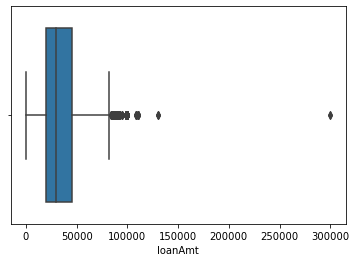

In [99]:
sns.boxplot(x=df['loanAmt'])

<AxesSubplot:xlabel='loanTenure'>

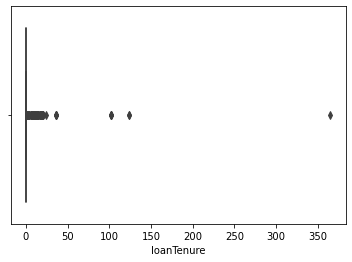

In [100]:
sns.boxplot(x=df['loanTenure'])

<AxesSubplot:xlabel='bureauScore'>

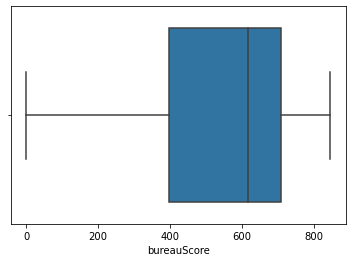

In [101]:
sns.boxplot(x=df['bureauScore'])

<AxesSubplot:xlabel='creditLimit'>

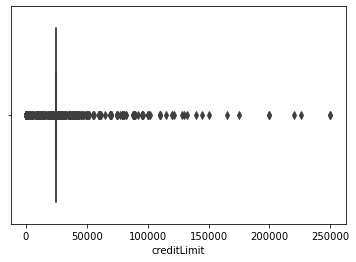

In [102]:
sns.boxplot(x=df['creditLimit'])

<AxesSubplot:xlabel='currentBalance'>

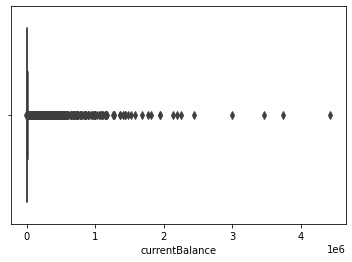

In [103]:
sns.boxplot(x=df['currentBalance'])

<AxesSubplot:xlabel='disbursedAmount'>

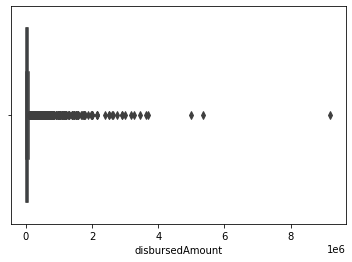

In [104]:
sns.boxplot(x=df['disbursedAmount'])

<AxesSubplot:xlabel='writeOffAmount'>

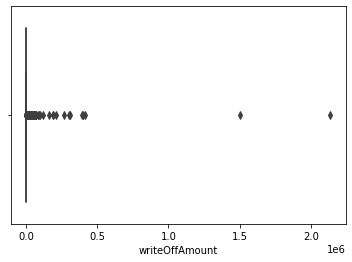

In [105]:
sns.boxplot(x=df['writeOffAmount'])

<AxesSubplot:xlabel='overdueAmount'>

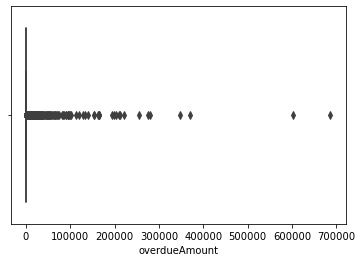

In [106]:
sns.boxplot(x=df['overdueAmount'])

In [107]:
df.shape

(7207, 19)

In [108]:
out_df = df[['loanTenure', 'loanAmt', 'creditLimit', 'currentBalance', 'disbursedAmount', 'writeOffAmount', 'overdueAmount']]
out_df.head()

,loanTenure,loanAmt,creditLimit,currentBalance,disbursedAmount,writeOffAmount,overdueAmount
0,0,15000,25000.0,0.0,17470.0,0.0,0.0
1,0,15000,25000.0,0.0,10209.0,0.0,0.0
2,0,15000,25000.0,0.0,50000.0,0.0,0.0
3,0,25000,25000.0,0.0,25990.0,0.0,0.0
4,0,30000,25000.0,0.0,61980.0,0.0,0.0


In [109]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                    14.0
pinCode            234803.0
loanAmt             25000.0
loanTenure              0.0
bureauScore           312.0
creditLimit             0.0
currentBalance       5712.5
repaymentTenure         0.0
disbursedAmount     37121.0
writeOffAmount          0.0
overdueAmount           0.0
dtype: float64


In [110]:
out_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
out_df.shape

(3204, 19)

In [111]:
df = out_df.copy()
df.head()

,Target,empType,education,age,gender,pinCode,addrsStateCode,maritalStatus,loanType,loanAmt,loanTenure,bureauScore,creditLimit,currentBalance,accountType,repaymentTenure,disbursedAmount,writeOffAmount,overdueAmount
0,Approved,Others,OTHERS,21,Male,302026,RAJASTHAN,Single,DPL,15000,0,825.0,25000.0,0.0,Consumer Loan,26.0,17470.0,0.0,0.0
1,Approved,Others,OTHERS,21,Male,302026,RAJASTHAN,Single,DPL,15000,0,825.0,25000.0,0.0,Consumer Loan,26.0,10209.0,0.0,0.0
2,Approved,Others,OTHERS,21,Male,302026,RAJASTHAN,Single,DPL,15000,0,825.0,25000.0,0.0,Personal Loan,26.0,50000.0,0.0,0.0
3,Declined,Others,OTHERS,30,Male,713336,WEST BENGAL,Single,DPL,25000,0,-1.0,25000.0,0.0,Consumer Loan,26.0,25990.0,0.0,0.0
4,Approved,Others,OTHERS,23,Male,686004,KERALA,missing,DPL,30000,0,830.0,25000.0,0.0,Two-Wheeler Loan,26.0,61980.0,0.0,0.0


In [112]:
df.shape

(3204, 19)

## 3.) Feature Engineering

### Separating variables

In [113]:
df.shape

(3204, 19)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3204 entries, 0 to 7725
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Target           3204 non-null   object 
 1   empType          3204 non-null   object 
 2   education        3204 non-null   object 
 3   age              3204 non-null   int64  
 4   gender           3204 non-null   object 
 5   pinCode          3204 non-null   int64  
 6   addrsStateCode   3204 non-null   object 
 7   maritalStatus    3204 non-null   object 
 8   loanType         3204 non-null   object 
 9   loanAmt          3204 non-null   int64  
 10  loanTenure       3204 non-null   int64  
 11  bureauScore      3204 non-null   float64
 12  creditLimit      3204 non-null   float64
 13  currentBalance   3204 non-null   float64
 14  accountType      3204 non-null   object 
 15  repaymentTenure  3204 non-null   float64
 16  disbursedAmount  3204 non-null   float64
 17  writeOffAmount

In [115]:
nominal_cols = ['empType', 'maritalStatus', 'loanType', 'addrsStateCode', 'accountType']
print('NOMINAL COLUMNS:', nominal_cols)

#num_cols = ['age', 'netMonthlyIncome', 'loanAmt', 'loanTenure', 'bureauScore']
#print('NUMERICAL COLUMNS:', num_cols)

# one-hot encoding > gender, maritalStatus, idType, loanType, empType
# ordinal > education

NOMINAL COLUMNS: ['empType', 'maritalStatus', 'loanType', 'addrsStateCode', 'accountType']


### Label encoding target variable

In [116]:
replace_map = {'Target': {'Approved': 1, 'Declined': 0}}
df.replace(replace_map, inplace=True)

In [117]:
replace_map = {'gender': {'Female': 1, 'Male': 0}}
df.replace(replace_map, inplace=True)

### Label encoding ordinal variable

In [118]:
df['education'].value_counts()

OTHERS            3170
GRADUATE            17
UNDER GRADUATE      16
POST-GRADUATE        1
Name: education, dtype: int64

In [119]:
replace_map = {'education': {'OTHERS':1, 'SSC':2, '12TH':3, 'UNDER GRADUATE':4, 'GRADUATE':5, 'POST-GRADUATE':6, 'DOCTORATE':7, 'PROFESSIONAL':8}}
df.replace(replace_map, inplace=True)

### One-hot encoding nominal variables

In [120]:
final_df = pd.get_dummies(df, columns=nominal_cols, drop_first=False)

In [121]:
final_df.head()

,Target,education,age,gender,pinCode,loanAmt,loanTenure,bureauScore,creditLimit,currentBalance,...,accountType_Microfinance Others,accountType_Microfinance Personal Loan,accountType_Mudra Loans - Shishu / Kishor / Tarun,accountType_Other,accountType_Overdraft,accountType_Personal Loan,accountType_Prime Minister Jaan Dhan Yojana - Overdraft,accountType_Property Loan,accountType_Tractor Loan,accountType_Two-Wheeler Loan
0,1,1,21,0,302026,15000,0,825.0,25000.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,21,0,302026,15000,0,825.0,25000.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,21,0,302026,15000,0,825.0,25000.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,30,0,713336,25000,0,-1.0,25000.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,23,0,686004,30000,0,830.0,25000.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [122]:
final_df.shape

(3204, 73)

### Normalization of features

### Restructuring the dataframe

### MinMaxScaler

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [123]:
scaler = MinMaxScaler()
minMax_X = scaler.fit_transform(final_df)

### Restructuring the dataframe

In [124]:
index_values = final_df.index.values
column_values = final_df.columns.values 

final_df = pd.DataFrame(data = minMax_X,  
                  index = index_values,  
                  columns = column_values)

In [125]:
final_df.head()

,Target,education,age,gender,pinCode,loanAmt,loanTenure,bureauScore,creditLimit,currentBalance,...,accountType_Microfinance Others,accountType_Microfinance Personal Loan,accountType_Mudra Loans - Shishu / Kishor / Tarun,accountType_Other,accountType_Overdraft,accountType_Personal Loan,accountType_Prime Minister Jaan Dhan Yojana - Overdraft,accountType_Property Loan,accountType_Tractor Loan,accountType_Two-Wheeler Loan
0,1.0,0.0,0.068182,0.0,0.264777,0.182428,0.0,0.976359,0.0,0.106861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.068182,0.0,0.264777,0.182428,0.0,0.976359,0.0,0.106861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.068182,0.0,0.264777,0.182428,0.0,0.976359,0.0,0.106861,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.272727,0.0,0.831931,0.304454,0.0,0.000000,0.0,0.106861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.113636,0.0,0.794243,0.365467,0.0,0.982270,0.0,0.106861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Log transforming skew variables

In [126]:
y_col = "Target"

X = final_df.drop(y_col, axis=1)
y = final_df[y_col]

In [127]:
num_cols = X.select_dtypes('number').columns.values
print(num_cols)

['education' 'age' 'gender' 'pinCode' 'loanAmt' 'loanTenure' 'bureauScore'
 'creditLimit' 'currentBalance' 'repaymentTenure' 'disbursedAmount'
 'writeOffAmount' 'overdueAmount' 'empType_Non-Government'
 'empType_Others' 'empType_Self Employed' 'maritalStatus_Married'
 'maritalStatus_Single' 'maritalStatus_missing' 'loanType_CDL'
 'loanType_DPL' 'loanType_LSL' 'loanType_TW'
 'addrsStateCode_ANDHRA PRADESH' 'addrsStateCode_ASSAM'
 'addrsStateCode_CHHATTISGARH' 'addrsStateCode_DELHI'
 'addrsStateCode_GUJARAT' 'addrsStateCode_HARYANA'
 'addrsStateCode_HIMACHAL PRADESH' 'addrsStateCode_JHARKHAND'
 'addrsStateCode_KARNATAKA' 'addrsStateCode_KERALA'
 'addrsStateCode_MADHYA PRADESH' 'addrsStateCode_MAHARASHTRA'
 'addrsStateCode_ORISSA' 'addrsStateCode_PUDUCHERRY'
 'addrsStateCode_PUNJAB' 'addrsStateCode_RAJASTHAN'
 'addrsStateCode_TAMIL NADU' 'addrsStateCode_TELANGANA'
 'addrsStateCode_UTTAR PRADESH' 'addrsStateCode_UTTARANCHAL'
 'addrsStateCode_WEST BENGAL' 'accountType_Auto Loan (Personal)'


In [128]:
skew_vals = X[num_cols].skew()

skew_limit = 0.75
skew_cols = (skew_vals.
            sort_values(ascending=False)
            .to_frame()
            .rename(columns={0:'Skew'})
            .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
accountType_Tractor Loan,56.603887
accountType_Microfinance Others,56.603887
accountType_Business Non-Funded Credit Facility General,56.603887
accountType_Business Non-Funded Credit Facility-Priority Sector- Small Business,56.603887
accountType_Prime Minister Jaan Dhan Yojana - Overdraft,56.603887
...,...
addrsStateCode_TAMIL NADU,1.157166
loanAmt,1.008896
loanType_CDL,0.780243
bureauScore,-0.884645


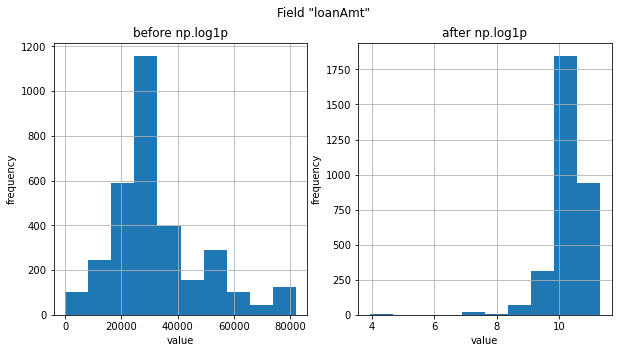

In [129]:
# Choose a field
field = "loanAmt"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [130]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    X[col] = X[col].apply(np.log1p)

In [131]:
X.head()

,education,age,gender,pinCode,loanAmt,loanTenure,bureauScore,creditLimit,currentBalance,repaymentTenure,...,accountType_Microfinance Others,accountType_Microfinance Personal Loan,accountType_Mudra Loans - Shishu / Kishor / Tarun,accountType_Other,accountType_Overdraft,accountType_Personal Loan,accountType_Prime Minister Jaan Dhan Yojana - Overdraft,accountType_Property Loan,accountType_Tractor Loan,accountType_Two-Wheeler Loan
0,0.0,0.068182,0.0,0.264777,0.167570,0.0,0.681256,0.0,0.101528,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.068182,0.0,0.264777,0.167570,0.0,0.681256,0.0,0.101528,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.068182,0.0,0.264777,0.167570,0.0,0.681256,0.0,0.101528,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000
3,0.0,0.272727,0.0,0.831931,0.265785,0.0,0.000000,0.0,0.101528,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.113636,0.0,0.794243,0.311496,0.0,0.684242,0.0,0.101528,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147


## 4.) Data Visualization

### Number of loans by account types

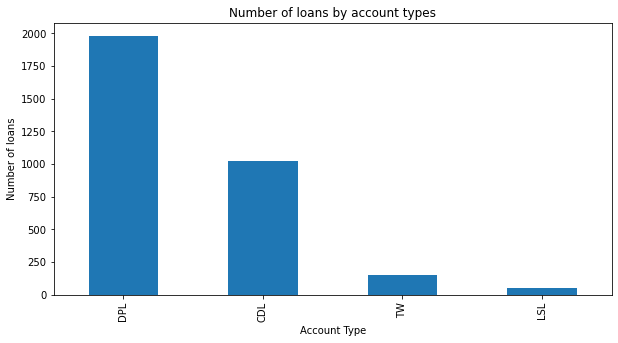

In [132]:
df.loanType.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of loans by account types")
plt.ylabel('Number of loans')
plt.xlabel('Account Type');

### Number of requests to bureau by state

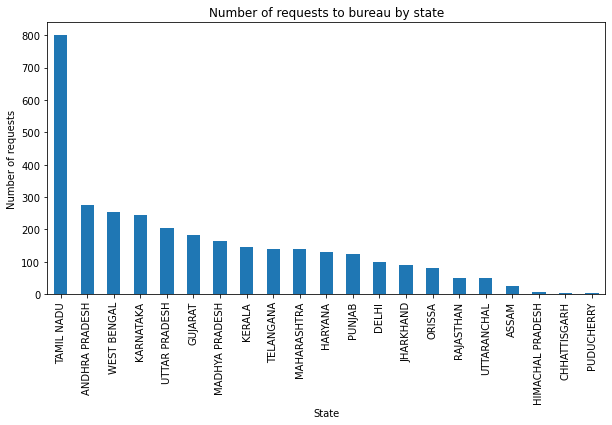

In [133]:
df.addrsStateCode.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of requests to bureau by state")
plt.ylabel('Number of requests')
plt.xlabel('State');

### State vs Target

### Number of requests to bureau by employment type

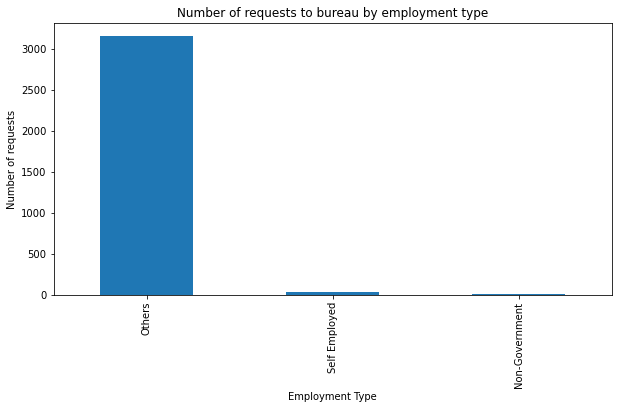

In [134]:
df.empType.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of requests to bureau by employment type")
plt.ylabel('Number of requests')
plt.xlabel('Employment Type');

### Correlation Matrix

In [135]:
target_df = final_df[['Target']]

final_df = pd.concat([target_df, X], axis=1)
final_df.head()

,Target,education,age,gender,pinCode,loanAmt,loanTenure,bureauScore,creditLimit,currentBalance,...,accountType_Microfinance Others,accountType_Microfinance Personal Loan,accountType_Mudra Loans - Shishu / Kishor / Tarun,accountType_Other,accountType_Overdraft,accountType_Personal Loan,accountType_Prime Minister Jaan Dhan Yojana - Overdraft,accountType_Property Loan,accountType_Tractor Loan,accountType_Two-Wheeler Loan
0,1.0,0.0,0.068182,0.0,0.264777,0.167570,0.0,0.681256,0.0,0.101528,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,1.0,0.0,0.068182,0.0,0.264777,0.167570,0.0,0.681256,0.0,0.101528,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,1.0,0.0,0.068182,0.0,0.264777,0.167570,0.0,0.681256,0.0,0.101528,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.272727,0.0,0.831931,0.265785,0.0,0.000000,0.0,0.101528,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,1.0,0.0,0.113636,0.0,0.794243,0.311496,0.0,0.684242,0.0,0.101528,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147


<AxesSubplot:>

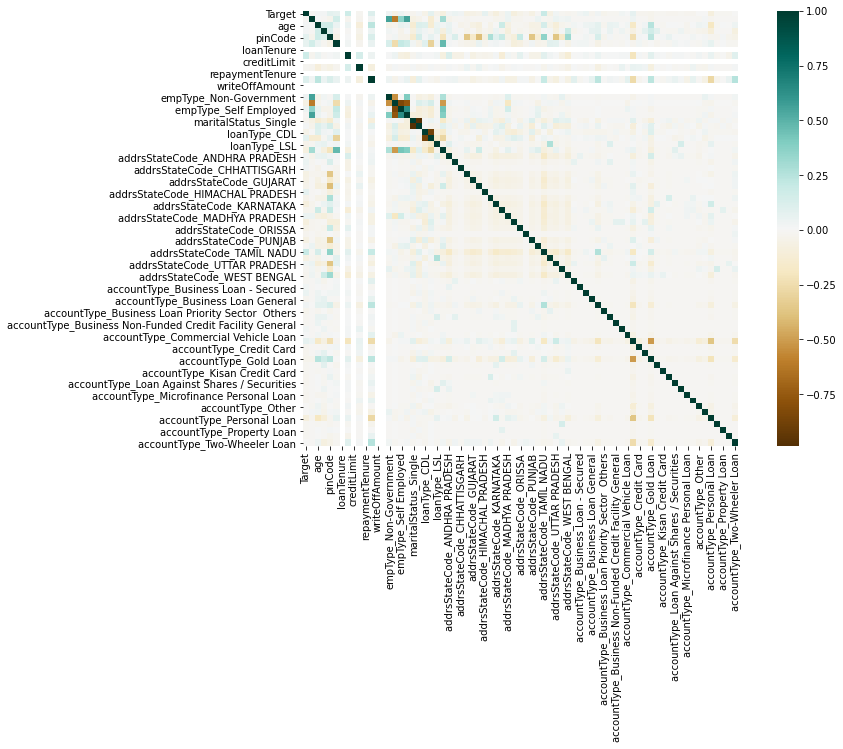

In [136]:
plt.figure(figsize=(14,8))
c= final_df.corr()
sns.heatmap(c,cmap="BrBG", square=True)

## 5.) Feature Selection

### Separating target and features

In [137]:
y_col = "Target"

X = final_df.drop(y_col, axis=1)
y = final_df[y_col]

### 1. Univariate Selection

In [138]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5) # 5 > neighbours
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [139]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  #print best features

                              Specs      Score
39        addrsStateCode_TAMIL NADU  62.620934
34       addrsStateCode_MAHARASHTRA  14.652117
31         addrsStateCode_KARNATAKA  14.599112
67        accountType_Personal Loan  13.501919
22                      loanType_TW  12.736499
29  addrsStateCode_HIMACHAL PRADESH  11.158171
6                       bureauScore  10.033023
54        accountType_Consumer Loan   9.480536
26             addrsStateCode_DELHI   8.253952
20                     loanType_DPL   8.129654


In [143]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = LogisticRegression()

results = list()
max_score = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[featureScores.nlargest(i, 'Score')['Specs']], y)
        results.append(scores)
        max_score.append(mean(scores))
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.697 (0.001)
> 2) 0.697 (0.001)
> 3) 0.697 (0.001)
> 4) 0.697 (0.001)
> 5) 0.697 (0.001)
> 6) 0.699 (0.002)
> 7) 0.720 (0.012)
> 8) 0.705 (0.015)
> 9) 0.705 (0.015)
> 10) 0.701 (0.017)
> 11) 0.703 (0.018)
> 12) 0.708 (0.018)
> 13) 0.709 (0.019)
> 14) 0.708 (0.019)
> 15) 0.702 (0.019)
> 16) 0.703 (0.019)
> 17) 0.723 (0.020)
> 18) 0.725 (0.021)
> 19) 0.727 (0.021)
> 20) 0.727 (0.021)
> 21) 0.726 (0.021)
> 22) 0.725 (0.021)
> 23) 0.727 (0.020)
> 24) 0.727 (0.020)
> 25) 0.728 (0.020)
> 26) 0.726 (0.022)
> 27) 0.726 (0.022)
> 28) 0.726 (0.022)
> 29) 0.726 (0.022)
> 30) 0.726 (0.021)
> 31) 0.726 (0.021)
> 32) 0.725 (0.020)
> 33) 0.723 (0.021)
> 34) 0.723 (0.020)
> 35) 0.723 (0.021)
> 36) 0.723 (0.020)
> 37) 0.723 (0.019)
> 38) 0.723 (0.019)
> 39) 0.723 (0.019)
> 40) 0.723 (0.019)
> 41) 0.723 (0.019)
> 42) 0.729 (0.016)
> 43) 0.729 (0.016)
> 44) 0.729 (0.016)
> 45) 0.729 (0.016)
> 46) 0.729 (0.016)
> 47) 0.730 (0.020)
> 48) 0.730 (0.020)
> 49) 0.731 (0.020)
> 50) 0.731 (0.020)
> 51) 0.7

In [153]:
chi_df = pd.DataFrame(list(zip(range(1,X.shape[1]+1), max_score)), 
               columns =['# Features', 'Score']) 
chi_df[chi_df['Score'] == chi_df['Score'].max()]

,# Features,Score
60,61,0.733658


### 2. Feature Importance

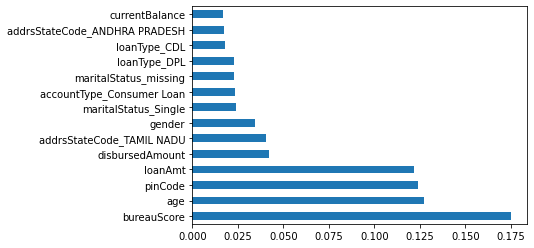

In [154]:
from sklearn.ensemble import ExtraTreesClassifier

model_fi = ExtraTreesClassifier()
model_fi.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).nlargest(14).plot(kind='barh')
plt.show()

In [157]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = LogisticRegression()

results_fi = list()
max_score_fi = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[feat_importances.nlargest(i).index], y)
        results_fi.append(scores)
        max_score_fi.append(mean(scores))
        #print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.697 (0.001)
> 2) 0.697 (0.001)
> 3) 0.697 (0.001)
> 4) 0.698 (0.002)
> 5) 0.700 (0.011)
> 6) 0.716 (0.014)
> 7) 0.716 (0.015)
> 8) 0.716 (0.015)
> 9) 0.724 (0.017)
> 10) 0.725 (0.017)
> 11) 0.723 (0.017)
> 12) 0.725 (0.018)
> 13) 0.729 (0.019)
> 14) 0.727 (0.017)
> 15) 0.729 (0.019)
> 16) 0.730 (0.017)
> 17) 0.728 (0.017)
> 18) 0.728 (0.017)
> 19) 0.727 (0.017)
> 20) 0.728 (0.017)
> 21) 0.727 (0.017)
> 22) 0.727 (0.016)
> 23) 0.728 (0.017)
> 24) 0.726 (0.017)
> 25) 0.724 (0.017)
> 26) 0.725 (0.017)
> 27) 0.723 (0.017)
> 28) 0.722 (0.017)
> 29) 0.725 (0.018)
> 30) 0.725 (0.018)
> 31) 0.724 (0.018)
> 32) 0.724 (0.018)
> 33) 0.728 (0.019)
> 34) 0.728 (0.019)
> 35) 0.728 (0.019)
> 36) 0.729 (0.019)
> 37) 0.729 (0.019)
> 38) 0.729 (0.019)
> 39) 0.728 (0.019)
> 40) 0.728 (0.020)
> 41) 0.728 (0.020)
> 42) 0.729 (0.020)
> 43) 0.729 (0.021)
> 44) 0.729 (0.021)
> 45) 0.729 (0.021)
> 46) 0.729 (0.021)
> 47) 0.730 (0.021)
> 48) 0.730 (0.020)
> 49) 0.730 (0.020)
> 50) 0.730 (0.021)
> 51) 0.7

In [158]:
feat_df = pd.DataFrame(list(zip(range(1,X.shape[1]+1), max_score_fi)), 
               columns =['# Features', 'Score']) 
feat_df[feat_df['Score'] == feat_df['Score'].max()]

,# Features,Score
15,16,0.730436


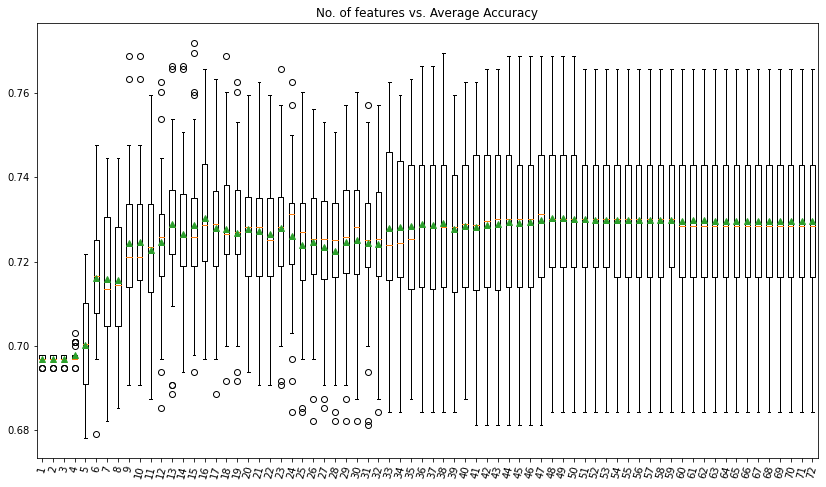

In [161]:
no_of_features = [str(i) for i in range(1,X.shape[1]+1)]
# plot model performance for comparison
plt.figure(figsize=(14,8))
plt.boxplot(results_fi, labels=no_of_features, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

### 3. Correlation Matrix with Heatmap

### 4. Recursive Feature Elimination (RFE)

In [162]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = LogisticRegression()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = LogisticRegression()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = LogisticRegression()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = LogisticRegression()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = LogisticRegression()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [165]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.702 (0.005)
>per 0.698 (0.003)
>cart 0.713 (0.012)
>rf 0.700 (0.008)
>gbm 0.713 (0.012)


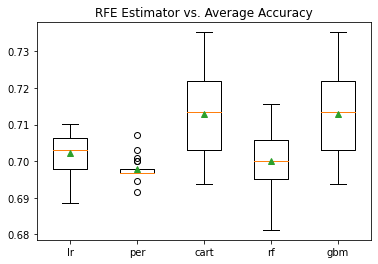

In [166]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('RFE Estimator vs. Average Accuracy')
plt.show()

In [167]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, X.shape[1]+1):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = LogisticRegression()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results_rfe, names, max_score_rfe = list(), list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results_rfe.append(scores)
    max_score_rfe.append(mean(scores))
    names.append(name)
    #print('> %s) %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [169]:
rfe_df = pd.DataFrame(list(zip(range(1,X.shape[1]+1), max_score_rfe)), 
               columns =['# Features', 'Score']) 
rfe_df[rfe_df['Score'] == rfe_df['Score'].max()]

,# Features,Score
31,32,0.730752


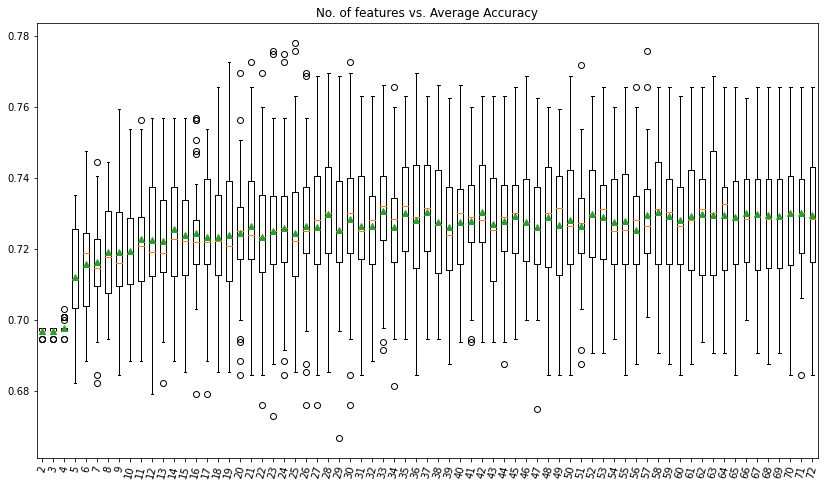

In [171]:
# plot model performance for comparison
plt.figure(figsize=(14,8))
plt.boxplot(results_rfe, labels=names, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

#### Suppressing any warnings

In [172]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [174]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=32)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 41.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 11.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 19.000
Column: 12, Selected False, Rank: 8.000
Column: 13, Selected False, Rank: 15.000
Column: 14, Selected False, Rank: 16.000
Column: 15, Selected False, Rank: 12.000
Column: 16, Selected False, Rank: 14.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selected

In [1]:
import anvil.server

anvil.server.connect('HZQUAQ5WEQKSBETGAMIAMPTF-VKPAPZZKSXXEU3II-CLIENT')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as CLIENT
